In [20]:
import numpy as np
import pandas as pd
from osgeo import gdal
# from osgeo import gdal_array
from osgeo import osr
# import rasterio
# import rasterio.plot as plt
# import matplotlib.pylab as plt
# import seaborn as sns
# data=pd.read_excel(r'D:\Desktop\gee-double-LAI.xls',header=0,sheet_name='solver-param')
data=pd.read_excel(r'D:\Desktop\mypaper\data\gee-LAI-108.xls',header=0,sheet_name='Sheet1')
data=np.array(data)
# data.head(10),
# data = data.set_index(['lat','lon'])

In [2]:
size=data.lat.drop_duplicates().count()
daset=np.array(data)

In [3]:
lon=daset[:,0].reshape(size,-1)
lat=daset[:,1].reshape(size,-1)
p0=daset[:,2].reshape(size,-1)
p1=daset[:,3].reshape(size,-1)
p2=daset[:,4].reshape(size,-1)
p3=daset[:,5].reshape(size,-1)
p4=daset[:,6].reshape(size,-1)
p5=daset[:,7].reshape(size,-1)

Text(0.5, 1.0, 'GEE-LAI-p0')

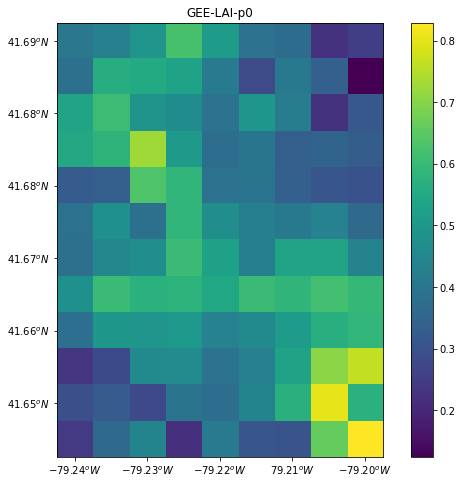

In [4]:
plt.figure(figsize=(10,8))
plt.imshow(p0,cmap = 'viridis',interpolation='nearest')
plt.xticks([0,2,4,6,8],
          ['$-79.24^{o}W$','$-79.23^{o}W$','$-79.22^{o}W$','$79.21^{o}W$','$-79.20^{o}W$'])

plt.yticks([0,2,4,6,8,10],
          ['$41.69^{o}N$','$41.68^{o}N$','$41.68^{o}N$','$41.67^{o}N$','$41.66^{o}N$','$41.65^{o}N$'])
plt.colorbar()
plt.title('GEE-LAI-p0', fontsize=12)

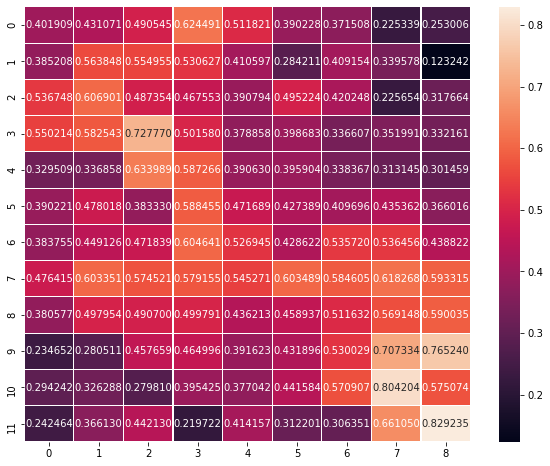

In [13]:
fig=plt.figure(figsize=(10,8)) 

h=sns.heatmap(p0, annot=True,fmt='f',linewidths=0.1) 

In [11]:
import raster

ModuleNotFoundError: No module named 'raster'

In [12]:
%pip install raster

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement raster (from versions: none)
ERROR: No matching distribution found for raster


In [ ]:
import gdal

class Dataset:
    def __init__(self, in_file):
        self.in_file = in_file  # Tiff或者ENVI文件

        dataset = gdal.Open(self.in_file)
        self.XSize = dataset.RasterXSize  # 网格的X轴像素数量
        self.YSize = dataset.RasterYSize  # 网格的Y轴像素数量
        self.GeoTransform = dataset.GetGeoTransform()  # 投影转换信息
        self.ProjectionInfo = dataset.GetProjection()  # 投影信息

    def get_data(self, band):
        """
        band: 读取第几个通道的数据
        """
        dataset = gdal.Open(self.in_file)
        band = dataset.GetRasterBand(band)
        data = band.ReadAsArray()
        return data

    def get_lon_lat(self):
        """
        获取经纬度信息
        """
        gtf = self.GeoTransform
        x_range = range(0, self.XSize)
        y_range = range(0, self.YSize)
        x, y = np.meshgrid(x_range, y_range)
        lon = gtf[0] + x * gtf[1] + y * gtf[2]
        lat = gtf[3] + x * gtf[4] + y * gtf[5]
        return lon, lat


In [ ]:
# # 以下代码演示读取E:/data/dataset.tif的第一个通道的数据，并且获取经纬度信息
# dir_path = r"E:/data"
# filename = "dataset.tif"
# file_path = os.path.join(dir_path, filename)
dataset = Dataset(filepath)

band = 1
data = dataset.get_data(band)  # 获取第一个通道的数据

longitude, latitude = dataset.get_lon_lat()  # 获取经纬度信息


In [ ]:
longitude